# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Induction and Motivation <a class="anchor" id="problem-background"></a>

<img src='https://borgenproject.org/wp-content/uploads/HR-Human-Resources-Management.jpg' width="700" />

>- Define your mission!
>>-The mission for this jupyter notebook is to determine optimal resource allocation for each department.

>- Real World Impact! 
>>-Resource Allocation is important in any given infrastructure to save different kind of costs and leveraging people's time and energy efficiently.

>- Key stakeholders!
>>-Administration, Talent Acquisition team, Human Resources Department

>- Start point
>>-Comparing different models through different means of accuracy measures.


* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [318]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1":F1
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

In [284]:
# Read in data - see what we're dealing with
df = pd.read_csv('SystemAdministrators.csv')
df.tail()

,task_completed,employee_experience,training_level4,training_level6,training_level8
70,0,5.60,1,0,0
71,0,5.90,0,0,1
72,0,6.40,0,1,0
73,0,3.80,1,0,0
74,0,5.30,1,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** label (1 if task is "completed", 0 otherwise)<br><br>

>[Go to Data Prep Outline](#data-prep)
---

In [285]:
df.describe()

,task_completed,employee_experience,training_level4,training_level6,training_level8
count,75.00,75.00,75.00,75.00,75.00
mean,0.20,6.80,0.76,0.17,0.07
std,0.40,2.27,0.43,0.38,0.25
min,0.00,2.70,0.00,0.00,0.00
25%,0.00,5.20,1.00,0.00,0.00
50%,0.00,6.30,1.00,0.00,0.00
75%,0.00,7.85,1.00,0.00,0.00
max,1.00,13.70,1.00,1.00,1.00


> **High-level Evaluation:**<br><br>
>**Observations:**<br>
>>- As we can see the column "employee_experience" the average years of experience is 6.8. 
>>- Most of the employees have "traning_level4" - almost 75%. 

> Since we are trying to predict "task_completed" we shall put relevant potential predictor variables by comparing correlation.


>[Go to Data Prep Outline](#data-prep)
---

> **Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>

>**To Do:**<br>
> 1. Evaluate correlation coefficients of numerical vars<br>
> 2. Evaluate categorical variables vs target variable

In [286]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_temp = df.select_dtypes(include=numerics)

In [287]:
df.select_dtypes(include=numerics).corr()

,task_completed,employee_experience,training_level4,training_level6,training_level8
task_completed,1.00,0.70,-0.19,0.12,0.13
employee_experience,0.70,1.00,-0.25,0.20,0.12
training_level4,-0.19,-0.25,1.00,-0.81,-0.48
training_level6,0.12,0.20,-0.81,1.00,-0.12
training_level8,0.13,0.12,-0.48,-0.12,1.00


<AxesSubplot:xlabel='task_completed'>

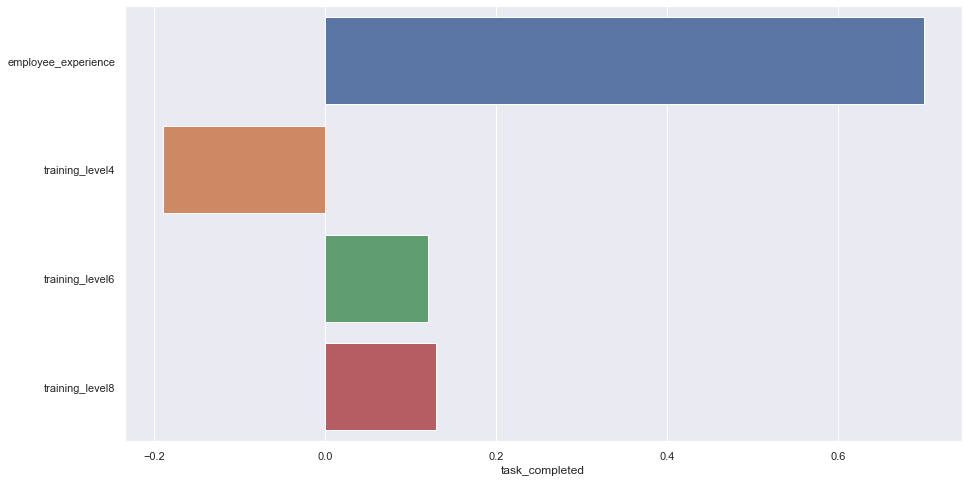

In [288]:
# Lets grab the correlations between our target variable and the remaining numerical features
# Instead of displaying in a heatmap or table, let's drop those values into a horizontal barchart
# for easier viewing

a = df.select_dtypes(include=numerics).corr()[['task_completed']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.task_completed[1:],y=a.index[1:],data=a, orient='h')


>Now let's see if any of these features are highly correlated with each other

In [289]:
df[['employee_experience', 'training_level4','training_level6','training_level8']].corr().round(2)

,employee_experience,training_level4,training_level6,training_level8
employee_experience,1.00,-0.25,0.20,0.12
training_level4,-0.25,1.00,-0.81,-0.48
training_level6,0.20,-0.81,1.00,-0.12
training_level8,0.12,-0.48,-0.12,1.00


>**Most highly correlated features with task_completed:**<br>
>- Employee_Experience (+)
<br>
>---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>

>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>


> **About TARGET variable : "task_completed"** <a class="anchor" id="data-split"></a>
<br>

>To Do:<br>
>1. Potential Predictor variables can be any variable that is attributing in predict variable 'task_completed' such as experience level etc.  
>3. Partition data into training set and testing set<br>


> **Train/Test split** <a class="anchor" id="data-split"></a>
<br>

>To Do:<br>
>1. We need to see determine the most accurate split ratio.
>2. Research random_state so that we can generate different accuracy scores.

>Result:<br>
>1. Since dataset is small we are going to go ahead with **80-20** split.
>2. After some thorough research, 1 convincing article(Check Appendix for link) and multiple hit and trial - the random state is **7** .



In [320]:
target = ['task_completed']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=7)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [321]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

In [313]:
# 1. train a classifier for different values of k
results = []
k_range = list(range(1,25,2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.80
1,3,0.87
2,5,0.87
3,7,0.80
4,9,0.87
5,11,0.87
6,13,0.87
7,15,0.87
8,17,0.87
9,19,0.87


>**Thought process behind selecting "k" value:**<br>
Our main objective is to get the highest accuracy score and selecting lowest "k" value at the same time. We can select k = 3 or 5 but k=3 is too small, thus we select k = 5

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [316]:
knn = KNeighborsClassifier(n_neighbors=(5))
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.87
Testing data Accuracy: 0.87


>**Result for selecting k = 5:**<br>
By the result we can say confidently, we did not overfit or underfit the data since the accuracy for both is exactly sAame.

In [317]:
class_perf_measures(knn,X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,3,0,12,0,0.20,1.00,0.20
1,0.10,2,9,3,1,0.40,0.67,0.73
2,0.20,2,9,3,1,0.40,0.67,0.73
3,0.30,2,12,0,1,1.00,0.67,0.93
4,0.40,2,12,0,1,1.00,0.67,0.93
5,0.50,1,12,0,2,1.00,0.33,0.87
6,0.60,0,12,0,3,0.00,0.00,0.80
7,0.70,0,12,0,3,0.00,0.00,0.80
8,0.80,0,12,0,3,0.00,0.00,0.80
9,0.90,0,12,0,3,0.00,0.00,0.80


>**Now let's dive into performance measures:**
>First we will define all the TP, TN, FP and FN in business terms
> - **TP** : The work is actually completed, this is what business requires.
> - **TN** : The work was not completed and the model also predicted the work was not completed, which does not concern business.
> - **FP** : The work was actually not completed but predicted as completed, which should be minimized according to business perspective. 
> - **FN** : The work was actually completed but predicted as not completed.


>**Business Objective:**
>> Our key stakeholder is HR department who aim to predict a employee's task completion capability based on their training level and number of years in experience. 

>> Over here the HR department wants us to focus on task completion. Thus the costliest mistake HR can make is to predict task is completed but not actually completed. 

>**Business-driven Data Decision**
>> We are going to select threshold **0.3** for following reasons: 
>>> - As it has the highest accuracy with lowest FP. 
>>> - The costliest mistake we can make is FP therefore we will use Precision.


>**Logistic Model:**<br>
>Let's produce the same table above but this time using a Logistic Model




In [295]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.9
Testing data Accuracy: 0.93


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


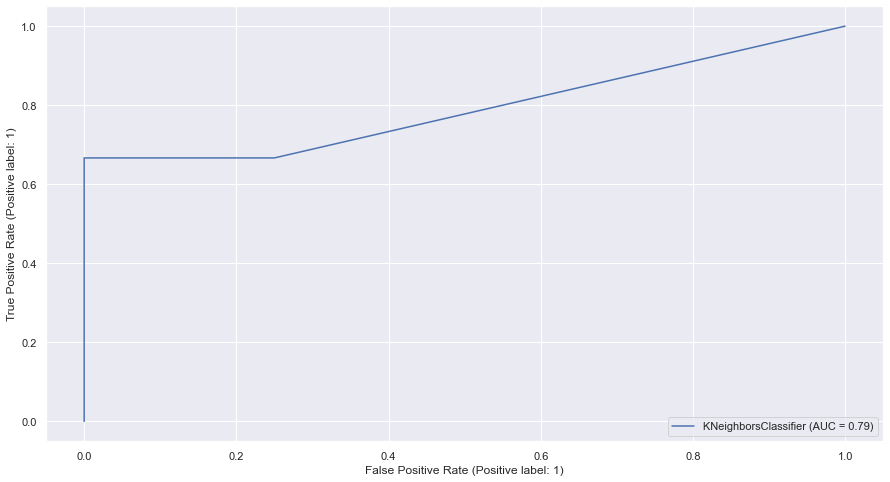

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


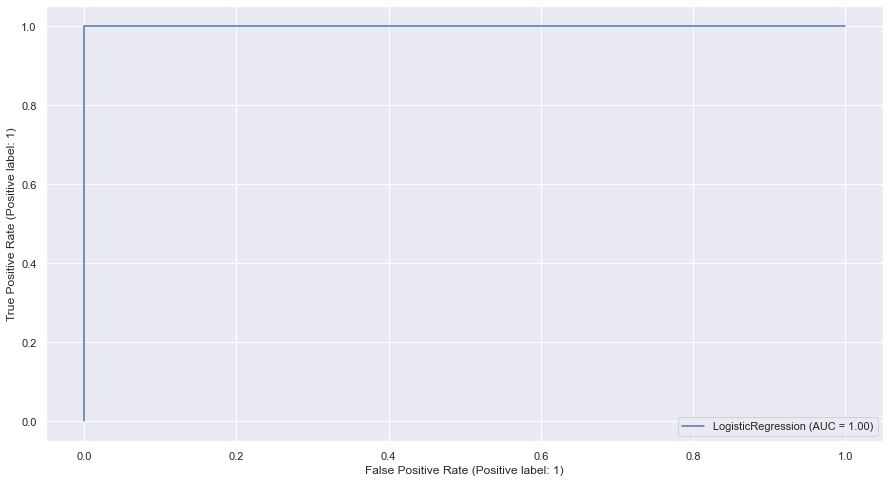

In [296]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our Logistic Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [322]:
class_perf_measures(lr_model,X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,3,0,12,0,0.20,1.00,0.20,0.33
1,0.10,3,9,3,0,0.50,1.00,0.80,0.67
2,0.20,2,12,0,1,1.00,0.67,0.93,0.80
3,0.30,2,12,0,1,1.00,0.67,0.93,0.80
4,0.40,2,12,0,1,1.00,0.67,0.93,0.80
5,0.50,2,12,0,1,1.00,0.67,0.93,0.80
6,0.60,2,12,0,1,1.00,0.67,0.93,0.80
7,0.70,1,12,0,2,1.00,0.33,0.87,0.50
8,0.80,1,12,0,2,1.00,0.33,0.87,0.50
9,0.90,1,12,0,2,1.00,0.33,0.87,0.50


> **Evaluation** <a class="anchor" id="Evaluation"></a>


1. **Prob Threshold = 0.2**:
    - Relative low threshold required to predict positive outcomes.  This means we would expect a LOT of positive predictions.  In our case "positive" means "Task Completed."  Sure enough, we DO see a lot of tasks being not completed in our dataset.
    - We also see a lot of false positive (FP) - this makes sense given the low threshold
    - We have 0 False Positives with threshold 0.2, which is surprisingly good. Even though threshold is so low, only the actual "task_completed" were picked by the model. 
    - FP's the costliest mistake we can make in this business decision, if we predict tasks is completed but actually not completed then it can lead to heavy loss in business. We want to avoid that at priority. 
    - FN's can be defined as task that was predicted to not be completed but actually completed which is acceptable. They will be costly because then we will have to remove resources from this task and allocate them to FP tasks. 
    <br><br>
2. **Prob Threshold = 0.6**:
    - This definitely increases the threshold for cutting into TP category, as of now we can see everything is similar to thresold 0.2. 
    - This works similar for probability threshold 0.2 because the dataset is too small.
<br><br>
3. **Prob Threshold = 0.8**:
    - This threshold is pretty high and that is the reason why it has thrown 2 values in FN because it is very hard to pass the cut off value.
    - As you can see our winning model predicted 2 FNs.
    - High threshold doesn't mean high accuracy because as we can see the values that are supposed to be kept less (FN and FP) have increased.
<br><br>
4. **Which threshold would you choose?  Justify your decision.**
    - According to the given data set and business requirement, I would choose either 0.2 or 0.6 because both of them are yielding same results but as we can see AUC curve from 0.2 the accuracy shoots up. Therefore, threshold 0.2 is the attractive choice.  

>[Go to Machine Learning Outline](#ml-model)
---

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

Optional - Extra Credit for this assignment

* [Go to Top](#table-of-content)

In [326]:
import pickle
pickle_out = open('classifier', mode='wb')

pickle.dump(knn, pickle_out) 

pickle_out.close()

In [ ]:
%%writefile app.py 
 
import pickle 

import streamlit as st 

 

pickle_in = open('classifier', 'rb') 

classifier = pickle.load(pickle_in) 

 

@st.cache() 

 

#Define the function which will make the prediction using data 

#inputs from users 

def prediction(employee_experience, training_level4, training_level6, training_level8): 

     

    # Make predictions 

    prediction = classifier.predict( 

        [[employee_experience, training_level4, training_level6, training_level8]]) 

     

    if prediction == 0: 

        pred = 'Task Incomplete' 

    else: 

        pred = 'Task Successfully Completed' 

    return pred 

 

# This is the main function in which we define our webpage 

def main(): 

     

    # Create input fields 

    employee_experience = st.number_input("Employee Experience (in years)", 

                                  min_value=0, 

                                  max_value=40, 

                                  value=0, 

                                  step=1, 

                                 ) 

    training_level4 = st.number_input("Training Level (1 - if Level 4, 0 - otherwise)", 

                              min_value=0, 

                              max_value=1, 

                              value=0, 

                              step=1 

                             ) 

 

    training_level6 = st.number_input("Training Level (1 - if Level 6, 0 - otherwise)", 

                              min_value=0, 

                              max_value=1, 

                              value=0, 

                              step=1 

                             ) 

    training_level8 = st.number_input("Training Level (1 - if Level 8, 0 - otherwise)", 

                              min_value=0, 

                              max_value=1, 

                              value=0, 

                              step=1 

                             ) 

     

    result = "" 

     

    # When 'Predict' is clicked, make the prediction and store it 

    if st.button("Predict"): 

        result = prediction(employee_experience, training_level4, training_level6, training_level8) 

        st.success(result) 

         

if __name__=='__main__': 

    main()
 

In [ ]:
!streamlit run app.py 